# Sorting Network Sets

Frequently a set of `Networks` is recorded while evolving some other variable; like voltage, or current or time. So... now you have this set of data  and you want to look at how some feature evolves, or calculate some representative  statics. This example demonstrates how to do this using `skrf.NetworkSets`. 

`NetworkSets`( [tutorial](http://scikit-rf.readthedocs.org/en/latest/tutorials/networkset.html) | [reference](http://scikit-rf.readthedocs.org/en/latest/reference/networkSet.html))
are used to store sets of Networks.

## Generate some Data

For the purpose of this example we use a predefined `skrf.Media` object to generate some networks, and save them as a series of touchstone files. Each  file is named with a timestamp, generated with `rf.now_string()`.

In [15]:

!rm -rf tmp
!mkdir tmp

wg = rf.wr10 # just a dummy media object to generate data
wg.frequency.npoints = 101

from time import sleep 
for k in range(10):
    # timestamp generated with `rf.now_string()`
    ntwk = wg.random(name = rf.now_string()+'.s1p')
    ntwk.write_touchstone(dir='tmp')
    sleep(.1)
    
    

Lets take a look at what we made

In [16]:
ls tmp

2016.01.27.15.15.56.275573.s1p  2016.01.27.15.15.56.813066.s1p
2016.01.27.15.15.56.381152.s1p  2016.01.27.15.15.56.921118.s1p
2016.01.27.15.15.56.489511.s1p  2016.01.27.15.15.57.028964.s1p
2016.01.27.15.15.56.597081.s1p  2016.01.27.15.15.57.137030.s1p
2016.01.27.15.15.56.705020.s1p  2016.01.27.15.15.57.244941.s1p


## Not sorted (default)

When created using `NetworkSet.from_dir()`, the `NetworkSet`'s stores each `Network` randomly

In [17]:
ns = rf.NS.from_dir('tmp')
ns.ntwk_set 

[1-Port Network: '2016.01.27.15.15.56.813066',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.57.244941',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.275573',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.57.028964',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.705020',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.489511',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.381152',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.921118',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.57.137030',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.597081',  75-110 GHz, 101 pts, z0=[ 50.+0.j]]

## Sort it

In [18]:
ns.sort()
ns.ntwk_set

[1-Port Network: '2016.01.27.15.15.56.275573',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.381152',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.489511',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.597081',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.705020',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.813066',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.921118',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.57.028964',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.57.137030',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.57.244941',  75-110 GHz, 101 pts, z0=[ 50.+0.j]]

## Sorting using `key` argument 

You can also pass a function through the `key` argument, which allows you to sort on arbitrary properties. For example, we could sort based on the sub-second field of the name,  

In [19]:
ns = rf.NetworkSet.from_dir('tmp')
ns.sort(key = lambda x: x.name.split('.')[0])
ns.ntwk_set

[1-Port Network: '2016.01.27.15.15.56.813066',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.57.244941',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.275573',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.57.028964',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.705020',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.489511',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.381152',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.921118',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.57.137030',  75-110 GHz, 101 pts, z0=[ 50.+0.j],
 1-Port Network: '2016.01.27.15.15.56.597081',  75-110 GHz, 101 pts, z0=[ 50.+0.j]]

## Extracting Datetimes

You can also convert the ntwk names to datetime objects, in case you want to plot something with pandas or do some other processing. There is a companion function to `rf.now_string()` which is `rf.now_string_2_dt()`. How creative..

In [20]:
ns.sort()
dt_idx = [rf.now_string_2_dt(k.name ) for k in ns]
dt_idx

[datetime.datetime(2016, 1, 27, 15, 15, 56, 275573),
 datetime.datetime(2016, 1, 27, 15, 15, 56, 381152),
 datetime.datetime(2016, 1, 27, 15, 15, 56, 489511),
 datetime.datetime(2016, 1, 27, 15, 15, 56, 597081),
 datetime.datetime(2016, 1, 27, 15, 15, 56, 705020),
 datetime.datetime(2016, 1, 27, 15, 15, 56, 813066),
 datetime.datetime(2016, 1, 27, 15, 15, 56, 921118),
 datetime.datetime(2016, 1, 27, 15, 15, 57, 28964),
 datetime.datetime(2016, 1, 27, 15, 15, 57, 137030),
 datetime.datetime(2016, 1, 27, 15, 15, 57, 244941)]

## Put into a Pandas DataFrame and Plot

The next step is to slice the network set along the time axis. For example we may want to look at S11 phase, at a few different frequencies. This can be done with the following script. Note that NetworkSets can be sliced by frequency with human readable strings, just like Networks.

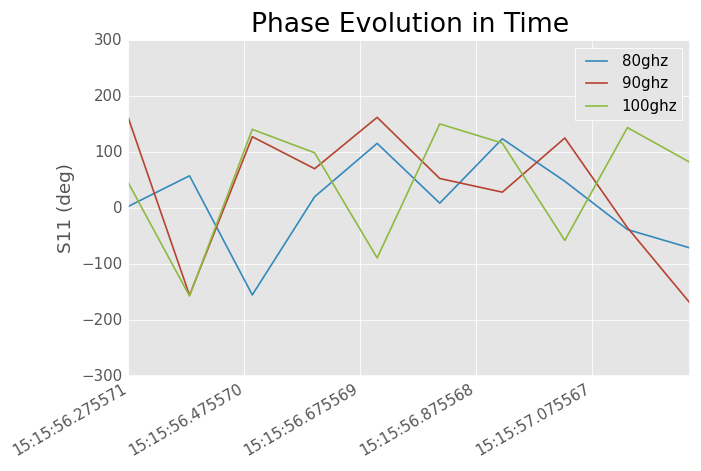

In [21]:
import pandas as pd 
dates = pd.DatetimeIndex(dt_idx)

# create a function to pull out S11 in degrees at a specific frequency

s_deg_at = lambda s:{s: [k[s].s_deg[0,0,0] for k in ns]}

for f in ['80ghz', '90ghz','100ghz']:
    df =pd.DataFrame(s_deg_at(f), index=dates)
    df.plot(ax=gca())
title('Phase Evolution in Time')
ylabel('S11 (deg)')

## Visualizing Behavoir with  `signature`

It may be of use to visualize the evolution of a scalar component of the network set over all frequencies. This can be done with a little bit of array manipulation and `imshow`. For example if we take the magnitude in dB for each network, and create  2D matrix from this,

In [22]:
mat = array([k.s_db.flatten() for k in ns])
mat.shape

(10, 101)

This array has shape  ( 'Number of Networks' , 'Number frequency points'). This can be visualized with imshow. Most of the code below just adds labels, and axis-scales. 

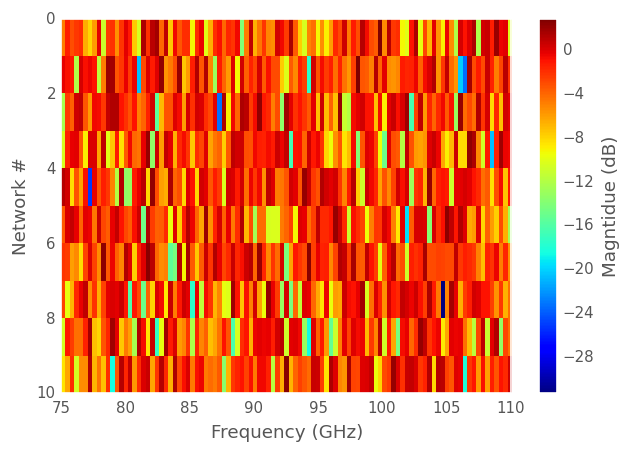

In [23]:
freq = ns[0].frequency

# creates x and y scales
extent = [freq.f_scaled[0], freq.f_scaled[-1], len(ns) ,0]

#make the image
imshow(mat, aspect='auto',extent=extent,interpolation='nearest')

# label things
grid(0)
freq.labelXAxis()
ylabel('Network #')
cbar = colorbar()
cbar.set_label('Magntidue (dB)')

This process is automated with the method `NetworkSet.signature()`. It even has a `vs_time` parameter which will automatically create the DateTime index from the Network's names, if they were written by `rf.now_string()` 

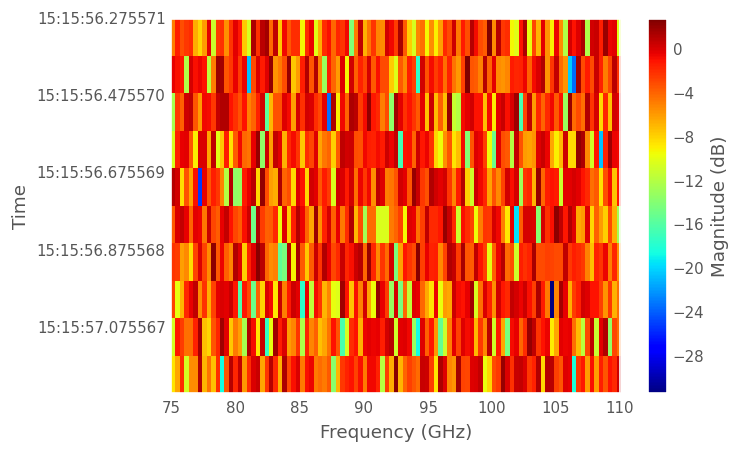

In [24]:
ns.signature(component='s_db', vs_time=True,cbar_label='Magnitude (dB)')